# Astrophysical S-Factor

Figure 5.2 from Chapter 5 of *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University 
Press.

Plot of the astrophysical S-factor for the reaction <sup>14</sup>N + p to <sup>15</sup>O + $\gamma$. Data
are from laboratory experiments. Adapted from Xu et al. 2013, Figure 79.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [2]:
plotFile = 'Fig5_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## S-Factor data

Two data files:
 * `14Npg15O_data.txt` is the experimental data of S as a function of E
 * `14Npg15O_model.txt` is a model fit to the data above
 
Source data have been converted into a 3-column file: wavelength in nm, spectral irradiance in 
erg/s/cm<sup>2</sup>/nm, and a T=5772K black body in the same spectral irradiance units.  We
read the first two and compute the third for ourselves.

In [3]:
# experimental data

expFile = '14Npg15O_data.txt'

data = pd.read_csv(expFile,sep=r'\s+',comment='#')
expE = np.array(data['E']) 
expS = np.array(data['S'])

# model data

modFile = '14Npg15O_model.txt'

data = pd.read_csv(modFile,sep=r'\s+',comment='#')
modE = np.array(data['E']) 
modS = np.array(data['S'])

# limits

minE = 0.   # keV
maxE = 1100.

minS = 0.7
maxS = 50000 # keV barn

## Figure 5.2

Plot the experimental data as open square points, model as a line

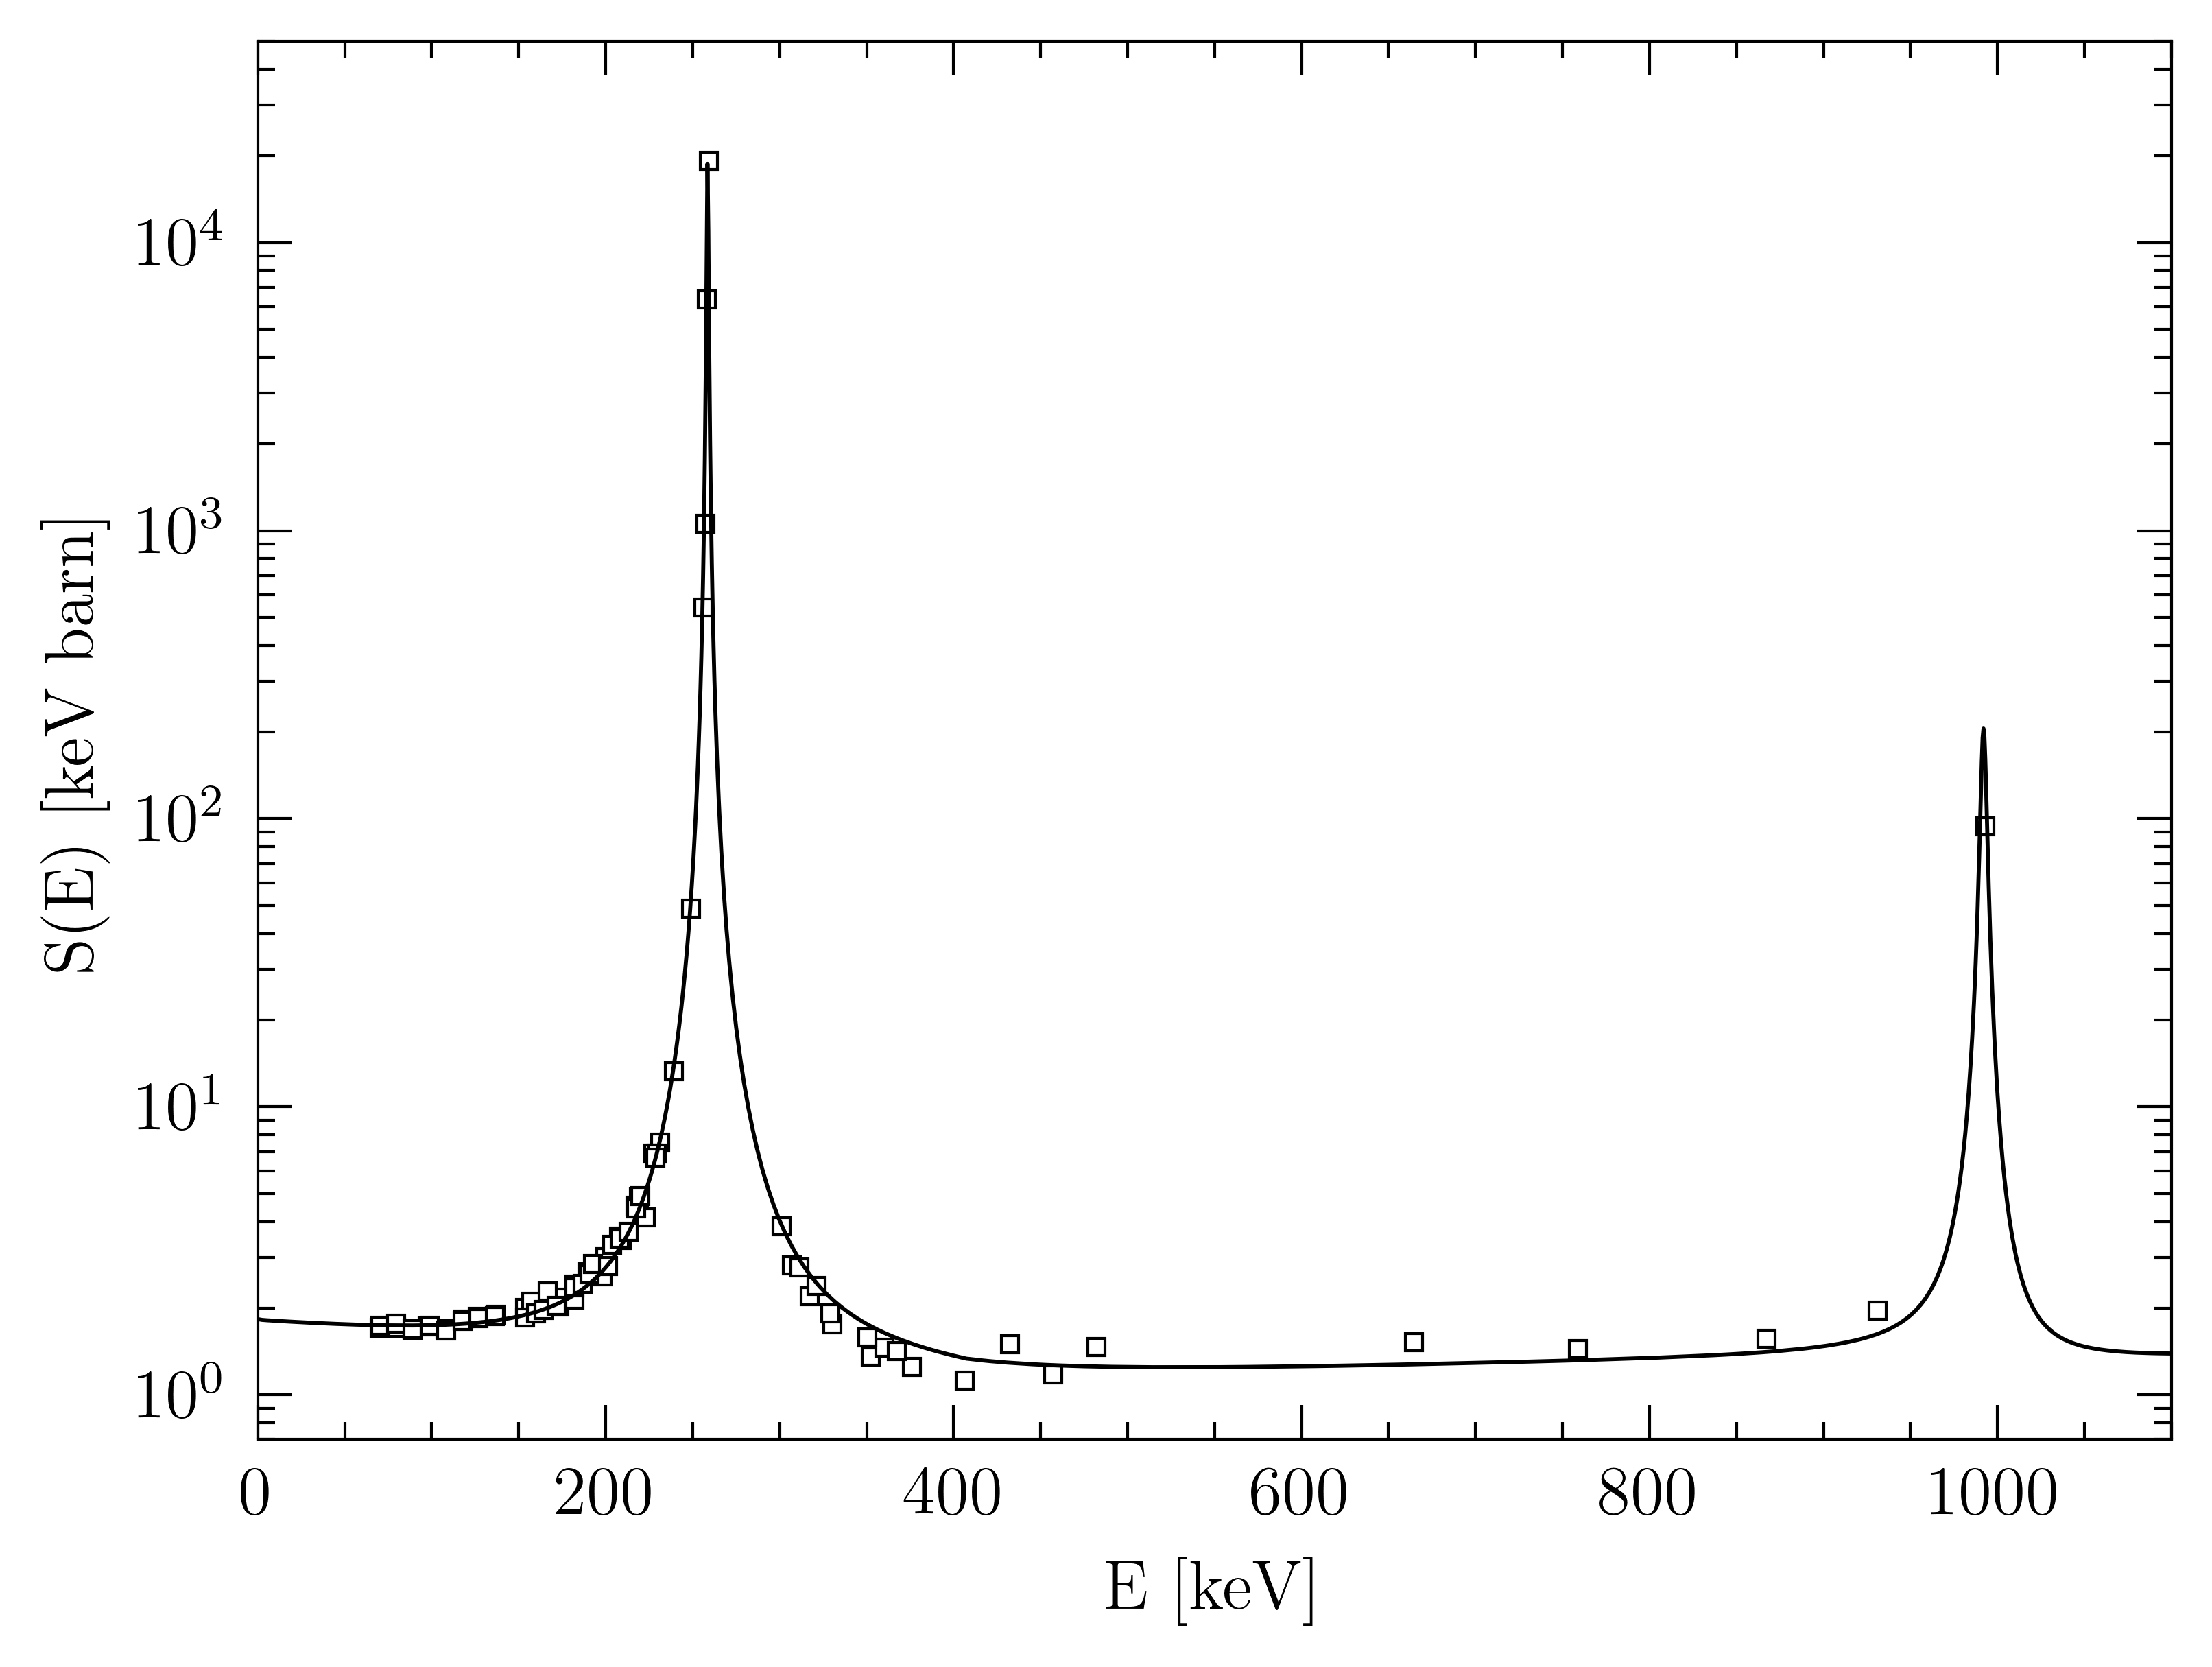

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minE,maxE)
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.set_xlabel(r'E [keV]',fontsize=axisFontSize)

ax.set_ylim(minS,maxS)
ax.set_yscale('log')
ax.set_ylabel(r'S(E) [keV barn]',fontsize=axisFontSize)

ax.plot(expE,expS,'s',mfc='white',mec='black',ms=3,mew=0.5,zorder=8)
ax.plot(modE,modS,'-',color='black',lw=0.7,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')